# Vehicle Routing Problem - Genetic Algorithms

In [1]:
import timeit
import matplotlib.pyplot as plt

from ga_vehicle_routing import cities_vr, population_vr
from ga_vehicle_routing import population_fitness_vr
from ga_vehicle_routing import population_switch_mutation_vr, population_partition_mutation_vr
from ga_vehicle_routing import population_ordered_crossover_vr
from ga_vehicle_routing import tournament_selection_vr

## Problem


The vehicle routing problem (VRP) is a generalization of the travelling salesman problem. Now, instead of having one person visiting all cities, we now have a certain amount of vehicles doing this task. They all start on the same city, visit a certain amount of cities, and then return to the original city. The objective is to find the shortest route that visits all cities, with a certain amount of vehicles doing so. The solutions were represented as lists cointaing the route each vehicle would do, each one of them represented as a list with the same format as described in notebook `ga_travelling_salsman.ipynb`. 

It is important to note that the problem can become as complicated as we want, adding time, traffic, and other elements, but here we only treated the distance between the cities. Another thing to highlight is that when the number of cities is equal to 1, we have the travelling salesman problem, but because of implementation of the operators, this case does not work here. One last thing is that we mantained the restriction that if the problem settings have a certain amount of vehicles, every individual will have this number fixed, and avery route will contain a non zero number of cities being visited by the vehicle. 

The operators utilized were:
- Switch mutation: each city in a certain route can be exchanged with another city in the same route.

- Partition mutation: each individual as a whole can be repartitioned, changing the routes of each vehicle.

- Orderd crossover: its the same operator utilized in noteboook `ga_travelling_salsman.ipynb`, but we first concatenate all routes, and then apply the same logic. 

- Roulette selection: each individual is selected with probability proportional to its fitness. In this case, we have a function that needs to be minimized, i.e., the weights are the inverse of the fitness.

The objective function to be minimized is the total distance. It can be written as:
\begin{equation}
f(X) = \sum_{x\in X} d_x
\end{equation}
Where $d_x$ is the total distance travelled by a certain vehicle.  

## Simulations

Firstly, we will simulate 10 cities being covered by 3 vehicles.

In [2]:
NUM_CITIES = 10
NUM_VEHICLES = 3

GENERATIONS = 200
COORD_MAX = 100
POPULATION_SIZE = 1000
TOURNAMENT_INDIVIDUALS = 3
CROSSOVER_RATE = 0.25
SWITCH_MUTATION_RATE = 0.1
ROUTE_MUTATION_RATE = 0.5
PARTITION_MUTATION_RATE = 0.1

CITIES = cities_vr(NUM_CITIES, COORD_MAX)

In [3]:
population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
hof = []

start = timeit.default_timer()

for _ in range(GENERATIONS):
    #Fitness calculation and selection
    fitness = population_fitness_vr(population, CITIES)
    selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)
    
    #Crossover
    crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)
    
    #Switch mutation
    switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                              ROUTE_MUTATION_RATE)
    partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                    PARTITION_MUTATION_RATE)

    
    #HOF atualization
    fitness = population_fitness_vr(partition_mutated_population, CITIES)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    best_individual = partition_mutated_population[index]
    hof.append(best_individual)
        
    #Restarting the population
    population = partition_mutated_population
    
end = timeit.default_timer()

In [4]:
fitness = population_fitness_vr(hof, CITIES)
best_fitness = min(fitness)
index = fitness.index(best_fitness)
solution = hof[index]

print(f'solution: {solution}, fitness={best_fitness}')
print()
print(f'runtime={(end - start):.3f}s')

solution: [[2], [7, 6, 4, 5, 3], [9, 1, 8]], fitness=383.2823344074946

runtime=13.034s


Vizualising the routes:

In [5]:
x0, y0 = CITIES[0][0], CITIES[0][1] 
x1, y1 = [CITIES[i][0] for i in solution[0]], [CITIES[i][1] for i in solution[0]]
x2, y2 = [CITIES[i][0] for i in solution[1]], [CITIES[i][1] for i in solution[1]]
x3, y3 = [CITIES[i][0] for i in solution[2]], [CITIES[i][1] for i in solution[2]]
labels = [i for i in range(len(CITIES))]

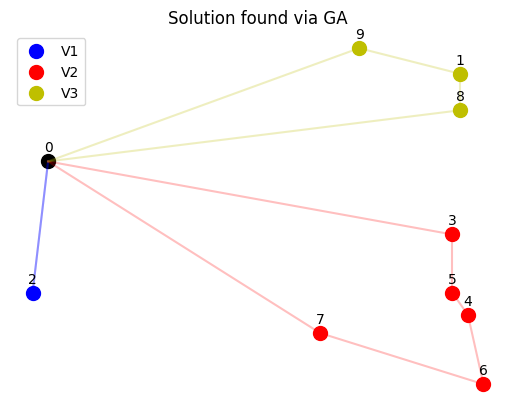

In [6]:
BLUE = 'b'
RED = 'r'
YELLOW = 'y'

plt.scatter(x1, y1, s=100, label='V1', color=BLUE)
plt.scatter(x2, y2, s=100, label='V2', color=RED)
plt.scatter(x3, y3, s=100, label='V3', color=YELLOW)
plt.scatter(x0, y0, s=100, color='k')
plt.annotate(0, (x0, y0), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

#Ploting route 1
for i, label in enumerate(solution[0]):
    plt.annotate(label, (x1[i], y1[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.plot((x0, x1[0]), (y0, y1[0]), color=BLUE, alpha=0.25)
plt.plot((x0, x1[-1]), (y0, y1[-1]), color=BLUE, alpha=0.25)

for i in range(len(solution[0]) - 1):
    plt.plot((x1[i], x1[i+1]), (y1[i], y1[i+1]), color=BLUE, alpha=0.25)

#Ploting route 2
for i, label in enumerate(solution[1]):
    plt.annotate(label, (x2[i], y2[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    
plt.plot((x0, x2[0]), (y0, y2[0]), color=RED, alpha=0.25)
plt.plot((x0, x2[-1]), (y0, y2[-1]), color=RED, alpha=0.25)

for i in range(len(solution[1]) - 1):
    plt.plot((x2[i], x2[i+1]), (y2[i], y2[i+1]), color=RED, alpha=0.25)
    
#Ploting route 3
for i, label in enumerate(solution[2]):
    plt.annotate(label, (x3[i], y3[i]), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.plot((x0, x3[0]), (y0, y3[0]), color=YELLOW, alpha=0.25)
plt.plot((x0, x3[-1]), (y0, y3[-1]), color=YELLOW, alpha=0.25)

for i in range(len(solution[2]) - 1):
    plt.plot((x3[i], x3[i+1]), (y3[i], y3[i+1]), color=YELLOW, alpha=0.25) 
    
plt.title('Solution found via GA')
plt.legend()
plt.axis('off')
plt.show()

Now, we will run the algorithm with the same conditions as above 5 times, and see if the results are consistent.

In [7]:
for i in range(5):
    population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
    hof = []

    for _ in range(GENERATIONS):
        #Fitness calculation and selection
        fitness = population_fitness_vr(population, CITIES)
        selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)

        #Crossover
        crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)

        #Switch mutation
        switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                                  ROUTE_MUTATION_RATE)
        partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                        PARTITION_MUTATION_RATE)

        #HOF atualization
        fitness = population_fitness_vr(partition_mutated_population, CITIES)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        best_individual = partition_mutated_population[index]
        hof.append(best_individual)

        #Restarting the population
        population = partition_mutated_population
        
    fitness = population_fitness_vr(hof, CITIES)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    solution = hof[index]
    print(f'solution in iteration {i}:')
    print(f'{solution}, fitness={best_fitness}')
    print()

solution in iteration 0:
[[2], [9, 1, 8], [3, 5, 4, 6, 7]], fitness=383.28233440749455

solution in iteration 1:
[[9, 1, 8], [2], [7, 6, 4, 5, 3]], fitness=383.28233440749455

solution in iteration 2:
[[3, 5, 4, 6, 7], [9, 1, 8], [2]], fitness=383.2823344074946

solution in iteration 3:
[[7, 6, 4, 5, 3], [2], [8, 1, 9]], fitness=383.2823344074946

solution in iteration 4:
[[8, 1, 9], [2], [3, 5, 4, 6, 7]], fitness=383.28233440749455



As we can see, the results obtained with the same conditions were relatively close in terms of fitness, showing that the convergence was good with only 200 generations. We also note that increasing the number of cities turns the convergence way harder, as the search space increases faster than $n!$, $n$ being the number of cities in the problem.

## Varying number of vehicles

Here, we will run the algorithm with the same cities as above, but varying the number of vehicles. Each number of vehicles will be tested 5 times, and the best solutions will be compared.

In [9]:
for NUM_VEHICLES in range(2, 7):
    HOF = []
    for i in range(5):
        population = population_vr(POPULATION_SIZE, NUM_CITIES, NUM_VEHICLES)
        hof = []
    
        for _ in range(GENERATIONS):
            #Fitness calculation and selection
            fitness = population_fitness_vr(population, CITIES)
            selected_population = tournament_selection_vr(population, fitness, TOURNAMENT_INDIVIDUALS)
    
            #Crossover
            crossover_population = population_ordered_crossover_vr(selected_population, CROSSOVER_RATE)
    
            #Switch mutation
            switch_mutated_population = population_switch_mutation_vr(crossover_population, SWITCH_MUTATION_RATE, 
                                                                      ROUTE_MUTATION_RATE)
            partition_mutated_population = population_partition_mutation_vr(switch_mutated_population, 
                                                                            PARTITION_MUTATION_RATE)
    
            #HOF atualization
            fitness = population_fitness_vr(partition_mutated_population, CITIES)
            best_fitness = min(fitness)
            index = fitness.index(best_fitness)
            best_individual = partition_mutated_population[index]
            hof.append(best_individual)
    
            #Restarting the population
            population = partition_mutated_population
            
        fitness = population_fitness_vr(hof, CITIES)
        best_fitness = min(fitness)
        index = fitness.index(best_fitness)
        solution = hof[index]
        HOF.append(solution)
    
    fitness = population_fitness_vr(HOF, CITIES)
    best_fitness = min(fitness)
    index = fitness.index(best_fitness)
    solution = HOF[index]
    print(f'number of vehicles: {NUM_VEHICLES}')
    print(f'solution: {solution}')
    print(f'fitness={best_fitness}')
    print()

number of vehicles: 2
solution: [[2], [9, 1, 8, 3, 5, 4, 6, 7]]
fitness=306.76560370748496

number of vehicles: 3
solution: [[9, 1, 8], [2], [7, 6, 4, 5, 3]]
fitness=383.28233440749455

number of vehicles: 4
solution: [[9], [3, 5, 4, 6, 7], [1, 8], [2]]
fitness=477.3045878939365

number of vehicles: 5
solution: [[2], [1, 8], [3], [5, 4, 6, 7], [9]]
fitness=580.2636942060406

number of vehicles: 6
solution: [[1], [3], [5, 4, 6, 7], [8], [2], [9]]
fitness=683.2623273318588



As we can see, increasing the number of vehicles is not always good for minimizing the distance. In this case, it is actually way worse to increase the number o vehicles, with the optima being reached with two vehicles.